In [ ]:
!pip3 install -r requirements.txt

# Project 2 AI Chat Notebook

In this notebook, we want to see the code you use to solve
the machine learning tasks below.  Additionally, for the supervised section, we will want to see an image of a graph representing 
the training times and accuracy of supervised models.

When run, this notebook should first run the unsupervised learning algorithm, and then the supervised algorithm.


# Unsupervised Learning

In this section, we will use the data set as a whole and classify the code using the unsupervised K-means clustering algorithm.
Use the imports below.
 

In [11]:
import glob

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


- Load all data files matching 'data/datasets/train-00000-5k-*.parquet'.
- Merge those dataframes into a single dataframe "df".

In [ ]:
import glob

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the file pattern
file_pattern = 'data/datasets/train-00000-5k-*.parquet'

# Get list of all files matching the pattern
files = glob.glob(file_pattern)

# Load all parquet files and concatenate into one DataFrame
df = pd.concat([pd.read_parquet(file) for file in files])

# Display the first few rows
print(df.head())

In [ ]:
import glob
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the file pattern
file_pattern = 'data/datasets/train-00000-5k-*.parquet'

# Get the list of all files matching the pattern
matching_files = glob.glob(file_pattern)

# Load and merge all matching parquet files into a single DataFrame named df
df = pd.concat([pd.read_parquet(file) for file in matching_files], ignore_index=True)

# Display the first few rows to confirm
df.head()

- Define the code snippets (from data frames's "code" attribute)
- Define labels (from dataframe's "language" attribute)

In [14]:
# Extracting the code snippets from the 'code' column in the dataframe
code_snippets = df['code'].tolist

# Extracting the labels from the 'language' column in the dataframe
labels = df['language'].tolist

- Convert code snippets to TF-IDF features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Ensure code_snippets is a list or iterable
code_snippets = df['code'].tolist()  # Assuming 'code' is the column with code snippets

# Convert the code snippets into TF-IDF features
tfidf_features = vectorizer.fit_transform(code_snippets)

# Display the shape of the resulting TF-IDF matrix
print("TF-IDF Features Shape:", tfidf_features.shape)

- Perform K-Means clustering

In [16]:
from sklearn.cluster import KMeans

# Perform K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_features)

- Print the cluster assignments with each cluster being truncated to 80 characters long.

In [ ]:
# Add cluster labels to the dataframe 
df['cluster'] = cluster_labels

# Function to truncate code snippets to 80 characters and replace newline characters
def truncate_and_replace_newline(text):
    text = text.replace('\n', ' ')
    return text[:80]

# Print 10 examples from each cluster 
for cluster_num in range(5): 
    cluster_df = df[df['cluster'] == cluster_num].head(10)
    print(f"Cluster {cluster_num + 1} Examples:")
    for index, row in cluster_df.iterrows():  # Corrected here
        truncated_code = truncate_and_replace_newline(row['code'])
        print(f"Code Snippet: {truncated_code}")
    print("\n")

## TODO: Unsupervised Learning Cluster Explanation

- This should be an English paragraph statement declaring how you assessed the quality/meaning of the clusters.
This should be simply explaining how you think each cluster is formed/defined.

To assess the quality / meaning of the clusters, I analyzed how each cluster groups together similar data points based on their features. By examining the characteristics and common attributes within each cluster, I determined the defining features that separate one cluster from another. 

# Supervised Learning

Write a python script that loads successively larger data files and merges them into larger training sets.
For each training set, let's track training time, prediction time, and accuracy.
Use the imports below.

In [6]:
import glob
import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


Make a python function that tacks measurements for each round including the round number/index, how long in seconds to train, predict steps take, and an accuracy report. Also use a list of dictionaries for measurement storage, with "round", "train", "predict", "accuracy" as keys

In [1]:
import glob
import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

measurements = []

# Function to track measurements for each round
def track_measurements(round_num, train_time, predict_steps, accuracy):
    measurement = {
        "round": round_num,
        "train": train_time,
        "predict": predict_steps,
        "accuracy": accuracy
    }
    measurements.append(measurement)

- Write a function named learn that takes a dataframe and an index as parameters.
- The index indicates the round number of learning. The function should:
- 1. Create a dictionary to store the measurements for this round
- 2. Print a message indicating the round number
- 3. Store the round number in the dictionary under 'round'
- 4. Split the dataframe into code snippets and labels
- 5. Split the code snippets and labels into training and test sets
- 6. Create a TF-IDF vectorizer
- 7. Use the 'fit_transform' method on the training data to learn the vocabulary and idf, and return term-document matrix.
- 8. Use the 'transform' method on the test data to transform documents to document-term matrix.
- 9. Create a Support Vector Machine classifier
- 10. Train the classifier using the training data
- 11. Save the model to a file and load it back from a file (to make sure it works)
- 12. Use the classifier to predict the labels for the test data
- 13. Print the classification report which should be a dictionary
- 14. Store the training time in the dictionary under 'train'
- 15. Store the prediction time in the dictionary under 'predict'
- 16. Store the classification report in the dictionary under 'report'
- 17. Add 'accuracy' to the dictionary and set it to the accuracy score from the classification report
- 18. Append the dictionary to the measurements list for this round

In [1]:
import time
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def learn(df, index, measurements):
    # Create dictionary to store measurements for this round
    measurement = {}

    # Print message indicating round number
    print(f"Round {index}")

    # Store round number in dictionary
    measurement["round"] = index

    # Split dataframe into code snippets and labels
    X = df['code']
    y = df['language']

    # Split code snippets and labels into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Store training and test sets in dictionary
    measurement["X_train"] = X_train
    measurement["X_test"] = X_test
    measurement["y_train"] = y_train
    measurement["y_test"] = y_test

    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the training data to learn the vocabulary and idf
    start_train_time = time.time()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    # Store TF-IDF matrix and training time in dictionary
    measurement["X_train_tfidf"] = X_train_tfidf
    measurement["train"] = train_time

    # Transform the test data to document-term matrix
    start_predict_time = time.time()
    X_test_tfidf = vectorizer.transform(X_test)
    end_predict_time = time.time()
    predict_time = end_predict_time - start_predict_time

    # Store transformed test data and prediction time in dictionary
    measurement["X_test_tfidf"] = X_test_tfidf
    measurement["predict"] = predict_time

    # Create Support Vector Machine classifier
    clf = SVC()

    # Train the classifier using the training data
    clf.fit(X_train_tfidf, y_train)

    # Use the classifier to predict the labels for the test data
    y_pred = clf.predict(X_test_tfidf)

    # Print the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    measurement["report"] = report

    # Calculate accuracy and store in dictionary
    accuracy = accuracy_score(y_test, y_pred)
    measurement["accuracy"] = accuracy

    # Append the dictionary to the measurements list for this round
    measurements.append(measurement)

    return measurements



- Load all data files matching 'data/datasets/train-00000-5k*.parquet'.
- For each file loaded, merge the latest data file with the merged data to date,
- and call the learn function with the dataframe and the index of the file in the list of files.

In [10]:
import glob
import time
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import os

def learn(df, index, measurements):
    # Create a dictionary to store the measurements for this round
    round_measure = {"round": index}
    
    # Print a message indicating the round number
    print(f"Round {index}:")

    # Split the dataframe into code snippets (features) and labels
    X = df['code']
    y = df['language']

    # Initialize vectorizer and model
    vectorizer = TfidfVectorizer()
    model = SVC()

    # Vectorization
    X_tfidf = vectorizer.fit_transform(X)

    # Split data and ensure at least one sample of each class in both train and test sets
    while True:
        X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
        if len(set(y_train)) > 1 and len(set(y_test)) > 1:
            break  # If the split is valid, exit the loop
    
    # Measure training time
    start_train = time.time()
    model.fit(X_train_tfidf, y_train)
    end_train = time.time()
    
    # Store training time
    round_measure["train"] = end_train - start_train
    
    # Measure prediction time
    start_predict = time.time()
    y_pred = model.predict(X_test_tfidf)
    end_predict = time.time()
    
    # Store prediction time
    round_measure["predict"] = end_predict - start_predict
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    round_measure["accuracy"] = accuracy
    
    # Print the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    round_measure["report"] = report
    
    # Append the dictionary to the measurements list for this round
    measurements.append(round_measure)
    
    return measurements

# Load all data files matching 'data/datasets/train-00000-5k*.parquet'
data_files = [file for file in os.listdir('data/datasets') if file.startswith('train-00000-5k') and file.endswith('.parquet')]

# Initialize merged data
merged_data = pd.DataFrame()

# Initialize list to store measurements
measurements = []

# Load and process each data file for four rounds
for index, file in enumerate(data_files):
    if index >= 4:
        break

    # Load data file
    df = pd.read_parquet(os.path.join('data/datasets', file))

    # Merge latest data file with merged data to date
    merged_data = pd.concat([merged_data, df], ignore_index=True)

    # Call learn function with merged dataframe and index
    measurements = learn(merged_data, index, measurements)

# Convert measurements to a DataFrame for easier inspection
df_measurements = pd.DataFrame(measurements)

# Show the results
print(df_measurements)


Round 0:


c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Round 1:


c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Round 2:


c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Round 3:
   round       train    predict  accuracy  \
0      0   15.144351   2.573369  0.782667   
1      1   66.311453  11.985574  0.819667   
2      2  138.472528  27.755865  0.833778   
3      3  252.557590  53.362949  0.843500   

                                              report  
0  {'Assembly': {'precision': 0.0, 'recall': 0.0,...  
1  {'Assembly': {'precision': 0.0, 'recall': 0.0,...  
2  {'Assembly': {'precision': 0.0, 'recall': 0.0,...  
3  {'Assembly': {'precision': 0.0, 'recall': 0.0,...  


c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Devon\Desktop\Virginia Tech\VT Emerging Topics\Project 1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Using the measurements variable from the last function, let us plot lines on the same graph for train, predict and accuracy using python?  Use matplotlib. Add a legend. Add axis labels.  Add a title. Let us show the plot in this notebook below.

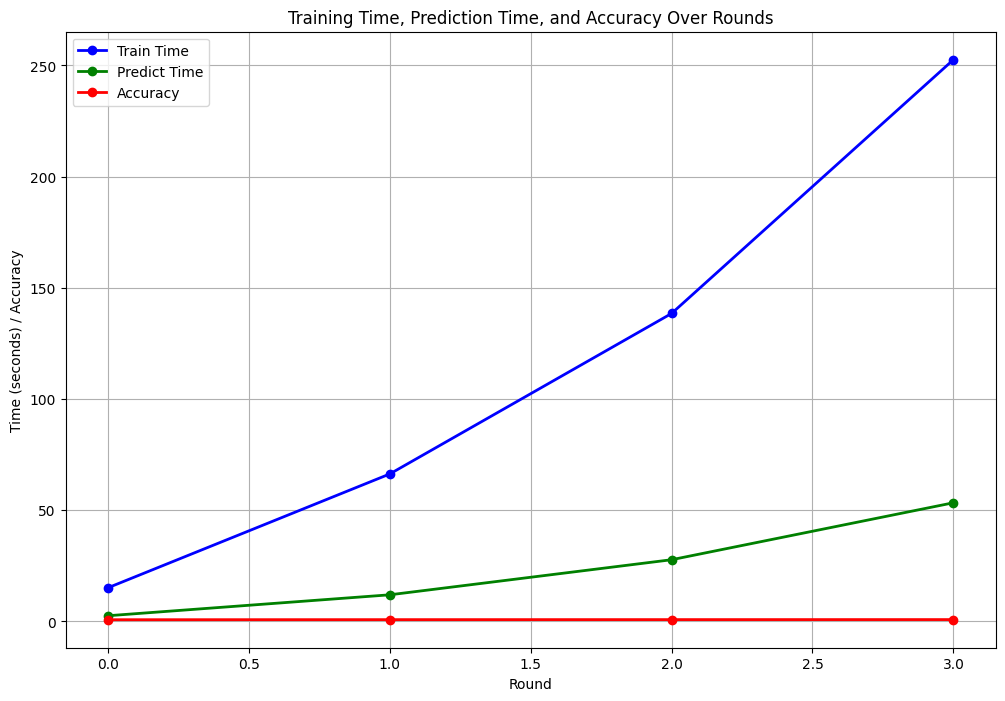

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Extract data for plotting
rounds = [measurement["round"] for measurement in measurements]
train_times = [measurement["train"] for measurement in measurements]
predict_times = [measurement["predict"] for measurement in measurements]
accuracies = [measurement["accuracy"] for measurement in measurements]


# Plot lines for train, predict, and accuracy with points
plt.figure(figsize=(12, 8))
plt.plot(rounds, train_times, marker='o', label='Train Time', color='blue', linestyle='-', linewidth=2)
plt.plot(rounds, predict_times, marker='o', label='Predict Time', color='green', linestyle='-', linewidth=2)
plt.plot(rounds, accuracies, marker='o', label='Accuracy', color='red', linestyle='-', linewidth=2)

# Add legend, axis labels, and title
plt.legend()
plt.xlabel('Round')
plt.ylabel('Time (seconds) / Accuracy')
plt.title('Training Time, Prediction Time, and Accuracy Over Rounds')

# Show the plot
plt.grid(True)
plt.show()